In [26]:
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile
import pandas as pd

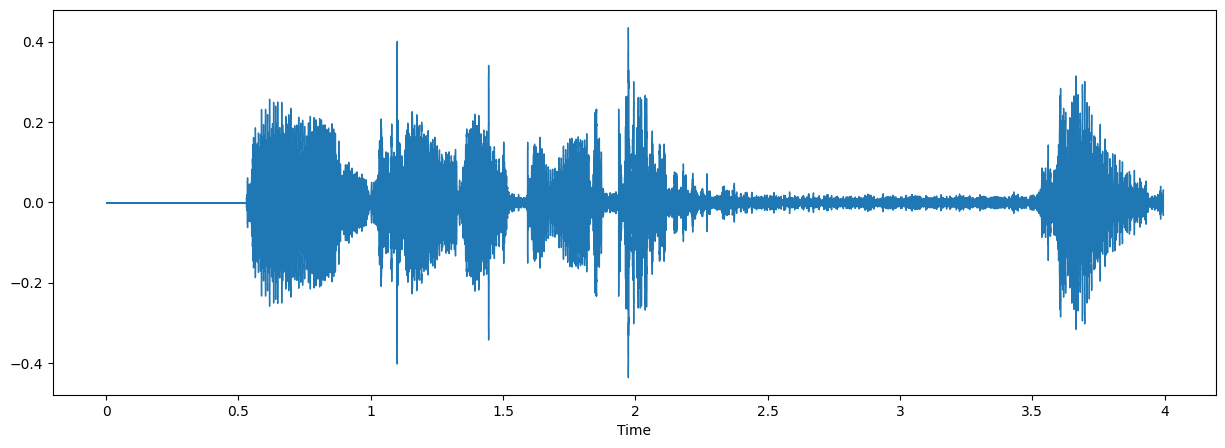

In [4]:
#The file 'output10.wav' in the next cell is the file that was recorded live using the code :
data, sampling_rate = librosa.load('output10.wav')
%matplotlib inline
import os
#import pandas as pd
import librosa.display
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

In [7]:
import numpy as np
import soundfile

In [8]:
#Feature Extraction of Audio Files Function 
#Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result=np.hstack((result, mel))
    return result


In [11]:
import pickle
Pkl_Filename = "Emotion_Voice_Detection_Model.pkl"

In [20]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Emotion_Voice_Detection_Model = pickle.load(file)

Emotion_Voice_Detection_Model

c:\Users\khans\.conda\envs\speech\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\khans\.conda\envs\speech\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


MLPClassifier(alpha=0.0005, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [22]:
#Now Cleaning Step is Performed where:
#DOWN SAMPLING OF AUDIO FILES IS DONE  AND PUT MASK OVER IT AND DIRECT INTO CLEAN FOLDER
#MASK IS TO REMOVE UNNECESSARY EMPTY VOIVES AROUND THE MAIN AUDIO VOICE 
def envelope(y , rate, threshold):
    mask=[]
    y=pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10) ,  min_periods=1 , center = True).mean()
    for mean in y_mean:
        if mean>threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

In [24]:
def get_emotion_from_model(audio_file_path):
  signal, rate = librosa.load(audio_file_path, sr = 16000)
  mask = envelope(signal,rate, 0.0005)
  clean_voice_file =audio_file_path.split(".")[-2]+"clean"+".wav"
  wavfile.write(filename= clean_voice_file, rate=rate,data=signal[mask])
  sfeature=extract_feature(clean_voice_file, mfcc=True, chroma=True, mel=True)
  emotion = Emotion_Voice_Detection_Model.predict([sfeature])
  return emotion

In [37]:
!pip install pydub

In [38]:
from pydub import AudioSegment

# Load the audio file
audio = AudioSegment.from_file(r"E:\SproutsAI\image_sentiment_detection\emotion_detection\demo_audio.wav", format="wav")

# Define the duration of each split in milliseconds
duration = 5000  # 5 seconds

# Get the number of splits
num_splits = len(audio) // duration

# Split the audio file into parts
splits = [audio[i * duration:(i + 1) * duration] for i in range(num_splits)]

# Save each split to a file
for i, split in enumerate(splits):
    split.export(r"E:\SproutsAI\image_sentiment_detection\emotion_detection\demo_audion_files\split_{}.wav".format(i), format="wav")


c:\Users\khans\.conda\envs\speech\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


observed_emotions=['calm', 'happy', 'fearful', 'disgust','neutral']

In [39]:
import os
emotion=[]
for file in os.listdir(r"E:\SproutsAI\image_sentiment_detection\emotion_detection\demo_audion_files"):
    file_path = os.path.join(r"E:\SproutsAI\image_sentiment_detection\emotion_detection\demo_audion_files", file)
    emotion.append(get_emotion_from_model(file_path))
emotion
    

C:\Users\khans\AppData\Local\Temp\ipykernel_6504\4274765906.py:21: FutureWarning: Pass y=[-0.00030376 -0.00094243 -0.00136456 ...  0.00103932  0.00224005
  0.00175342] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\khans\AppData\Local\Temp\ipykernel_6504\4274765906.py:21: FutureWarning: Pass y=[0.00109834 0.00160316 0.00141911 ... 0.00148083 0.00154994 0.00158709] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\khans\AppData\Local\Temp\ipykernel_6504\4274765906.py:21: FutureWarning: Pass y=[0.02171033 0.03575305 0.02829786 ... 0.08198734 0.07125008 0.05110093] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=

[array(['fearful'], dtype='<U7'),
 array(['fearful'], dtype='<U7'),
 array(['fearful'], dtype='<U7'),
 array(['happy'], dtype='<U7'),
 array(['happy'], dtype='<U7'),
 array(['happy'], dtype='<U7'),
 array(['happy'], dtype='<U7'),
 array(['happy'], dtype='<U7'),
 array(['happy'], dtype='<U7'),
 array(['fearful'], dtype='<U7'),
 array(['happy'], dtype='<U7'),
 array(['happy'], dtype='<U7'),
 array(['happy'], dtype='<U7'),
 array(['fearful'], dtype='<U7'),
 array(['happy'], dtype='<U7'),
 array(['happy'], dtype='<U7'),
 array(['happy'], dtype='<U7'),
 array(['happy'], dtype='<U7'),
 array(['fearful'], dtype='<U7'),
 array(['happy'], dtype='<U7'),
 array(['calm'], dtype='<U7'),
 array(['neutral'], dtype='<U7'),
 array(['calm'], dtype='<U7'),
 array(['calm'], dtype='<U7'),
 array(['happy'], dtype='<U7'),
 array(['calm'], dtype='<U7'),
 array(['calm'], dtype='<U7'),
 array(['fearful'], dtype='<U7'),
 array(['happy'], dtype='<U7'),
 array(['fearful'], dtype='<U7'),
 array(['happy'], dtype='<U

In [44]:
for p in range(len(emotion)):
    emotion[p] =emotion[p][0]

In [46]:
import pandas as pd

In [47]:
df = pd.DataFrame(emotion,columns=['emotion'])
df

,emotion
0,fearful
1,fearful
2,fearful
3,happy
4,happy
...,...
117,fearful
118,happy
119,neutral
120,fearful


In [50]:
df.to_csv("emotions.csv")

In [45]:
emotion

['fearful',
 'fearful',
 'fearful',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'fearful',
 'happy',
 'happy',
 'happy',
 'fearful',
 'happy',
 'happy',
 'happy',
 'happy',
 'fearful',
 'happy',
 'calm',
 'neutral',
 'calm',
 'calm',
 'happy',
 'calm',
 'calm',
 'fearful',
 'happy',
 'fearful',
 'happy',
 'happy',
 'happy',
 'happy',
 'fearful',
 'happy',
 'fearful',
 'happy',
 'happy',
 'fearful',
 'happy',
 'fearful',
 'fearful',
 'happy',
 'happy',
 'disgust',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'disgust',
 'happy',
 'happy',
 'disgust',
 'happy',
 'happy',
 'fearful',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'fearful',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'disgust',
 'happy',
 'happy',
 'disgust',
 'fearful',
 'happy',
 'disgust',
 'happy',
 'happy',
 'happy',
 'fearful',
 'fearful',
 'happy',
 'happy',
 'happy',
 'fearful',
 'happy',
 'happy',
 'fearful',
 'fearful',
 'fearful

In [36]:
print(get_emotion_from_model(r"E:\SproutsAI\image_sentiment_detection\emotion_detection\demo_audio.wav"))

C:\Users\khans\AppData\Local\Temp\ipykernel_6504\4274765906.py:21: FutureWarning: Pass y=[-3.0376142e-04 -9.4243098e-04 -1.3645564e-03 ... -4.5909916e-04
  2.5822662e-04  3.1917371e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


['happy']


In [ ]:
label_id: 0
score: 0.8579023480415344
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.40758436918258667
    ymin: 0.5485765933990479
    width: 0.2686036229133606
    height: 0.3581276535987854
  }
  relative_keypoints {
    x: 0.516550600528717
    y: 0.6409369111061096
  }
  relative_keypoints {
    x: 0.6248275637626648
    y: 0.6580602526664734
  }
  relative_keypoints {
    x: 0.5847111344337463
    y: 0.7311453819274902
  }
  relative_keypoints {
    x: 0.5674111843109131
    y: 0.8067038655281067
  }
  relative_keypoints {
    x: 0.41372641921043396
    y: 0.6622450947761536
  }
  relative_keypoints {
    x: 0.648883581161499
    y: 0.6945443153381348
  }
}